# 3.2 Factor analysis

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@gmail.com.mx
> * isc.ErickAguilar@gmail.com

---

Some timed is not possible to measure directly the concepts of primary interest however it is possible to observe its effect on observable variables. Factor analysis is a multivariate technique applied to a set of observed variables that seeks to find underlying factors (subsets of variables) from which the observed variables were generated. Factor analysis is carried out on the correlation matrix of the observed variables. A factor is a weighted average of
the original variables. The factor analyst hopes to find a few factors from which the original correlation matrix
may be generated.

The basis of factor analysis is a regression model linking the manifest variables to a set of unobserved (and unobservable) latent variables. In essence the model assumes that the observed relationships between the manifest variables (as measured by their covariances or correlations) are a result of the relationships of these variables to the latent variables. (Since it is the covariances or correlations of the manifest variables that are central to factor analysis, we can, **in the description of the mathematics of the method given below, assume that the manifest variables all have zero mean**.

Lets the **observable random vector** $\mathbf{x} \in \mathbb{R^p}$ the factor model postulates that $\mathbf{x}$ is linearly dependent upon a few unobervable random variables $F_1,\dots,F_m$ called common factors, and p adition sources of deviation $\varepsilon_1,\dots,\varepsilon_p$ called specific factors, this specific factors is asociated with only one , this model can be expressed as equation system.

$$
\begin{align*}
X_1 &= \ell_{11} F_1 + \ell_{12} F_2 +\dots + \ell_{1m} F_m+\varepsilon_1\\
\vdots &= \vdots \\
X_p &= \ell_{p1} F_1 + \ell_{p2} F_2 +\dots + \ell_{pm} F_m+\varepsilon_p\\
\\
\left[ \begin{array}{ccccc}
X_{1} \\
\vdots  \\
X_{p} \end{array} \right]
& = 
\left[ \begin{array}{ccccc}
\ell_{1 1} & \cdots & \ell_{1 m} \\
\vdots  & \ddots & \vdots \\
\ell_{p 1} & \cdots & \ell_{p m} \end{array} \right]
\left[ \begin{array}{ccccc}
F_{1} \\
\vdots \\
F_{p} \end{array} \right]
+
\left[ \begin{array}{ccccc}
\varepsilon_{1} \\
\vdots  \\
\varepsilon_{p} \end{array} \right]\\
\\
\textbf{x} & =\textbf{LF}+\mathbf{\epsilon}\\
\end{align*}
$$

The coeficient matrix $\mathbf{L}$ is called matrix of factor loadings, some assumptions for the model are as follows:
 * $E[\mathbf{F}]=0$
 * $E[\mathbf{\epsilon}]=0$
 * $Cov[\mathbf{\epsilon}]=E[\mathbf{\epsilon \epsilon'}]=\mathbf{\Psi}=diag(\Psi_1,\dots,\Psi_p)$
 * Ortogonality in factors: $Cov[\mathbf{F}]=E[\mathbf{FF'}]=\mathbf{I_m}$
 * $\mathbf{F}$ and $\mathbf{\epsilon}$ are independent: $Cov[\mathbf{\epsilon,F}]=E[\mathbf{\epsilon F'}]=0$

Examining implications of model assumptions:

$$
\begin{align*}
V[Y_i] &= \ell_{i1}^2 V[F_1 ]+ \ell_{i2}^2 V[F_2] +\dots + \ell_{im}^2 V[F_m]+V[\varepsilon_i]\\
&=\underset{communalities}{\underbrace{\ell_{11}^2+\ell_{12}^2+\dots+\ell_{1m}^2}}+\underset{specific variance}{\underbrace{\sigma^2}}
\end{align*}
$$

This model is knowed as ortogonal factor model, and implies covariance structure for $\mathbf{x}$.

$$
\begin{align*}
\mathbf{\Sigma}&= E[\mathbf{xx'}] \\
&= E[(\textbf{LF}+\mathbf{\epsilon})(\textbf{LF}+\mathbf{\epsilon})']\\
&= E[(\textbf{LF}+\mathbf{\epsilon})((\textbf{LF})'+\mathbf{\epsilon}')]\\
&= E[\textbf{LF}(\textbf{LF})'+\mathbf{\epsilon}(\textbf{LF})'+\textbf{LF}\mathbf{\epsilon}'+\mathbf{\epsilon}\mathbf{\epsilon}']\\
&= E[\textbf{LF}(\textbf{LF})']+E[\mathbf{\epsilon}(\textbf{LF})']+E[\textbf{LF}\mathbf{\epsilon}']+E[\mathbf{\epsilon}\mathbf{\epsilon}']\\
&= E[\textbf{LFF'L}]+E[\mathbf{\epsilon F'L'}]+E[\textbf{LF}\mathbf{\epsilon}']+E[\mathbf{\epsilon}\mathbf{\epsilon}']\\
&= \textbf{L}E[\textbf{FF'}]\textbf{L'}+E[\mathbf{\epsilon F'}]\textbf{L'}+\textbf{L'}E[\textbf{F}\mathbf{\epsilon}']+E[\mathbf{\epsilon}\mathbf{\epsilon}']\\
\mathbf{\Sigma}&= \textbf{LL'}+\mathbf{\Psi}\\
\implies \mathbf{\Psi}&=\textbf{LL'}-\mathbf{\Sigma}&
\end{align*}
$$

### The principal compent method
___

From the scpetral descomposition of $\mathbf{\Sigma}$ it's possible aproximate $\mathbf{LL'}$:

$$
\begin{align*}
\Sigma&=\left[\sum_{k=1}^p\lambda_k\mathbf{\gamma_k'\gamma_k}\right]\\
&\simeq\left[\sum_{k=1}^m\lambda_k\mathbf{\gamma_k'\gamma_k}\right]\\
&=\left[\sqrt{\lambda_1} \mathbf{\gamma_1} \dots \sqrt{\lambda_1} \mathbf{\gamma_p} \right]
\left[ \begin{array}{ccccc}
\sqrt{\lambda_1} \mathbf{\gamma_1} \\
\vdots  \\
\sqrt{\lambda_1} \mathbf{\gamma_p}\end{array} \right]\\
&=\mathbf{L L'}\\
\end{align*}
$$

This in turn suggests that the specific variances, which are the diagonal elements of this matrix $\mathbf{\Psi}$, can be estimated using this expression:

$$
\psi_i = \sigma_i^2 - \sum_{k=1}^{m} \lambda_k \gamma_{ki}^2
$$

In [1]:
run MvaUtils.py

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as mt 
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import col as c
from pyspark.mllib.linalg.distributed import RowMatrix
pd.set_option('max_colwidth',100)
plt.style.use('seaborn-paper')

In [3]:
try:
    sc = SparkContext('local[*]')
except:
    sc = SparkContext.getOrCreate('local[*]')
sqlContext = SQLContext(sc)

In [4]:
idCol = ['City']
features = ['Climate','HousingCost','HlthCare','Crime',\
            'Transp','Educ','Arts','Recreat','Econ']
p=len(features)
ratedPlacesDatasetPath = 'DataSets/PlacesRated.csv'
placesRatedDF = sqlContext.read.format('com.databricks.spark.csv')\
                          .options(header='true',inferschema='true')\
                          .load(ratedPlacesDatasetPath).select(idCol+features)\
                          .rdd.map(lambda r: ((r[0]),)+tuple([mt.log10(v) for v in r[1:p+1]]))\
                          .toDF(idCol+features)
placesRatedDF.limit(5).toPandas()

,City,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
0,Abilene,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
1,Akron,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
2,Albany,2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
3,Albany-Schenectady-Troy,2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194
4,Albuquerque,2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927


In [5]:
import pyspark.sql.functions as f
aggExpresions = [f.mean(c(colName)).alias('mean'+colName) for colName in features]+\
                [f.stddev(c(colName)).alias('stddev'+colName) for colName in features]
statisticsDF = placesRatedDF.select(aggExpresions)

In [6]:
stdExpresions = [((c(colName)-c('mean'+colName))/c('stddev'+colName))\
                 .alias('std'+colName) for colName in features]
sdPlatecRated = placesRatedDF.crossJoin(f.broadcast(statisticsDF))\
                             .select([c(idCol[0])]+stdExpresions)
sdPlatecRated.limit(5).toPandas()

,City,stdClimate,stdHousingCost,stdHlthCare,stdCrime,stdTransp,stdEduc,stdArts,stdRecreat,stdEcon
0,Abilene,-0.014588,-1.091682,-1.811908,0.080253,0.052110,-0.122905,-0.381465,-0.419848,1.758009
1,Akron,0.362622,0.028706,0.822352,-0.024791,0.580593,-1.186725,0.989070,1.030945,-1.132754
2,Albany,-0.424928,-0.396975,-0.513235,0.207776,-1.230611,-0.764284,-1.525236,-1.557043,-0.165994
3,Albany-Schenectady-Troy,-0.360098,-0.089388,0.624479,-0.983152,1.526771,1.688161,0.846964,-0.095034,0.402612
4,Albuquerque,0.884158,0.155796,0.974656,1.297771,1.393458,0.682526,0.819276,1.013316,0.281080


In [7]:
stdFeatures = ['std'+colName for colName in features]
mean, sigma = computeMaximumLikelihoodEstimators(sdPlatecRated.select(stdFeatures))
eigenValues, eigenVectors = diagonalize(sigma)
sqrtLambda = np.diag([mt.sqrt(Lambda) for Lambda in eigenValues])

In [8]:
explainedVar = [Lambda/sum(eigenValues) for Lambda in eigenValues]
cumulativeExplainedVar = np.cumsum(explainedVar)
eigenvaluesResumePD = pd.DataFrame(np.matrix([eigenValues.tolist(),explainedVar,\
                              cumulativeExplainedVar.tolist()]).transpose(),\
                              columns=['eigenvalue','explained_var','cumulaitve_var'])
eigenvaluesResumePD

,eigenvalue,explained_var,cumulaitve_var
0,3.297793,0.366421,0.366421
1,1.213562,0.134840,0.501262
2,1.105530,0.122837,0.624098
3,0.907280,0.100809,0.724907
4,0.860629,0.095625,0.820533
5,0.562186,0.062465,0.882998
6,0.483821,0.053758,0.936756
7,0.318072,0.035341,0.972097
8,0.251128,0.027903,1.000000


In [9]:
def computeCommunalities(factorLoadingsPD):
    communalitiesM = np.matrix(np.dot(factorLoadingsPD.as_matrix(),\
                            factorLoadingsPD.as_matrix()\
                           .transpose()).diagonal()).transpose()
    communalitiesPD = pd.DataFrame(communalitiesM,index=features,\
                                   columns=['communalities'])
    factorLoadingsPD = factorLoadingsPD.join(communalitiesPD)
    factorLoadingsPD[['residual_correlation']]=1-factorLoadingsPD[['communalities']]
    return factorLoadingsPD

In [10]:
k=3
factorLoadingsPD = pd.DataFrame(np.dot(eigenVectors,sqrtLambda[:,:k]),\
                                columns=['factors_'+str(i+1)+'_loadings' for i in range(0,k)],\
                                index=features)

computeCommunalities(factorLoadingsPD)

,factors_1_loadings,factors_2_loadings,factors_3_loadings,communalities,residual_correlation
Climate,-0.286819,0.075603,0.840848,0.795007,0.204993
HousingCost,-0.698073,0.153355,0.083712,0.517832,0.482168
HlthCare,-0.744389,-0.409595,-0.020477,0.722302,0.277698
Crime,-0.470524,0.522313,0.135076,0.512449,0.487551
Transp,-0.680792,-0.155864,-0.148325,0.509772,0.490228
Educ,-0.498170,-0.498323,-0.253456,0.560739,0.439261
Arts,-0.860498,-0.115020,0.011593,0.753821,0.246179
Recreat,-0.641790,0.321609,0.043967,0.517259,0.482741
Econ,-0.297846,0.595373,-0.533407,0.727704,0.272296


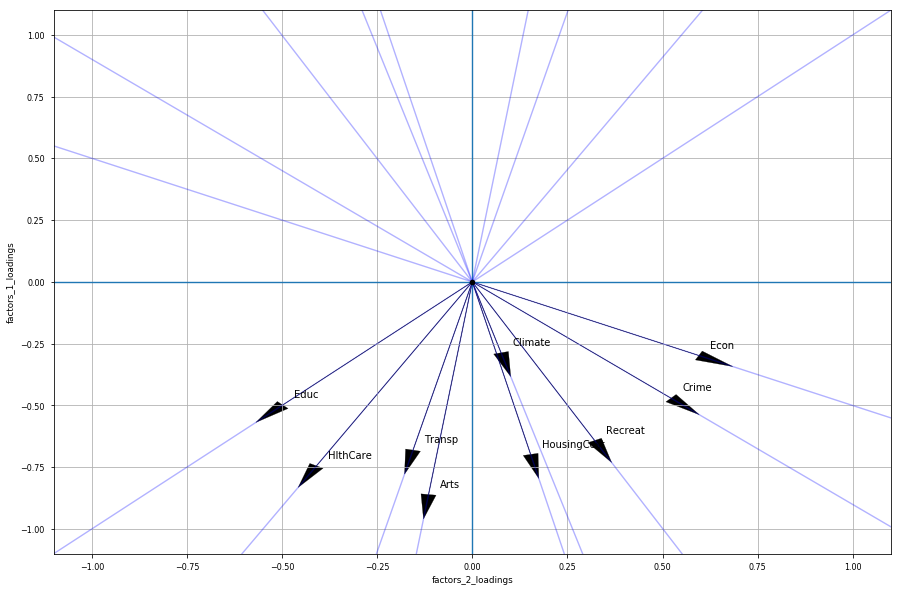

In [11]:
plt.figure(figsize=(15,10))
plt.axis([-1.1,1.1,-1.1,1.1])
factors = ['factors_2_loadings','factors_1_loadings']
plotProjectedBase(plt,factors,factorLoadingsPD,features)

In [12]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi,gamma=1.0,q=40,tol=1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(0,q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3-(gamma/p)*\
                 dot(Lambda,diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return (dot(Phi,R),R)

In [13]:
varimaxMatrix, rotationMatrix = varimax(factorLoadingsPD[['factors_'+str(i+1)+'_loadings'\
                                          for i in range(0,k)]].as_matrix())
varimaxFactorsLoadingsPD = pd.DataFrame(varimaxMatrix,\
                                        columns=['factors_'+str(i+1)+'_varimax'\
                                        for i in range(0,k)],\
                                        index=features)
varimaxFactorsLoadingsPD = computeCommunalities(varimaxFactorsLoadingsPD)
varimaxFactorsLoadingsPD

,factors_1_varimax,factors_2_varimax,factors_3_varimax,communalities,residual_correlation
Climate,-0.078636,-0.060877,0.886069,0.795007,0.204993
HousingCost,-0.497112,0.422673,0.303412,0.517832,0.482168
HlthCare,-0.842429,0.005418,0.112186,0.722302,0.277698
Crime,-0.106989,0.610880,0.357531,0.512449,0.487551
Transp,-0.676578,0.227015,0.021870,0.509772,0.490228
Educ,-0.715037,-0.110768,-0.192851,0.560739,0.439261
Arts,-0.783409,0.294918,0.230467,0.753821,0.246179
Recreat,-0.368581,0.549464,0.281951,0.517259,0.482741
Econ,-0.022343,0.795864,-0.306277,0.727704,0.272296


In [14]:
pd.DataFrame(rotationMatrix)

,0,1,2
0,0.843339,-0.458456,-0.280353
1,0.516688,0.835153,0.188557
2,0.147692,-0.303873,0.941195


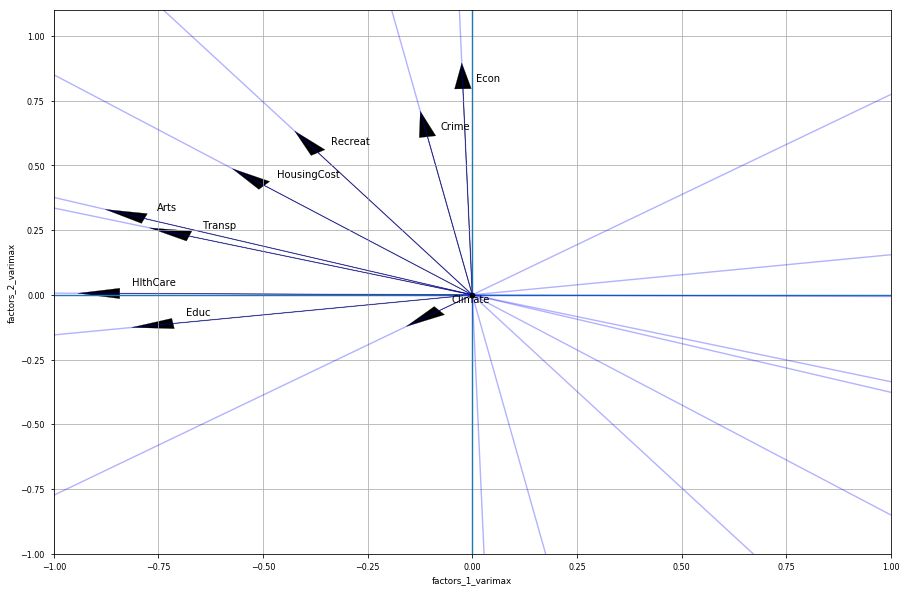

In [15]:
plt.figure(figsize=(15,10))
plt.axis([-1,1,-1,1.1])
varimaxFactors = ['factors_1_varimax','factors_2_varimax']
plotProjectedBase(plt,varimaxFactors,varimaxFactorsLoadingsPD,features)

In [16]:
def factorScores(randomVector,weightMatrix):
    return np.dot(randomVector,weightMatrix).transpose()

def rotateVector(vector,rotationMatrix):
    return np.dot(rotationMatrix,vector)

In [17]:
sqrtLambdaInv = np.diag([1/mt.sqrt(l) for l in eigenValues[0:k]])
LL_T_inv = eigenVectors[:,:k].transpose()
weightMatrix = np.dot(sqrtLambdaInv,LL_T_inv).transpose()

factorScoresDF = sdPlatecRated.rdd.map(lambda r:((r[0]),)+\
                 tuple([float(f) for f in rotateVector(factorScores(r[1:p+1],weightMatrix),rotationMatrix) ]))\
                 .toDF(idCol+['factorScore'+str(i) for i in range(1,k+1)])
factorScoresDF.limit(5).toPandas()

,City,factorScore1,factorScore2,factorScore3
0,Abilene,0.194956,1.289494,-1.154504
1,Akron,-0.627231,-0.256999,0.982178
2,Albany,0.942021,0.930020,0.119927
3,Albany-Schenectady-Troy,0.365622,-1.840849,-0.790232
4,Albuquerque,-1.322277,-0.473826,0.120342


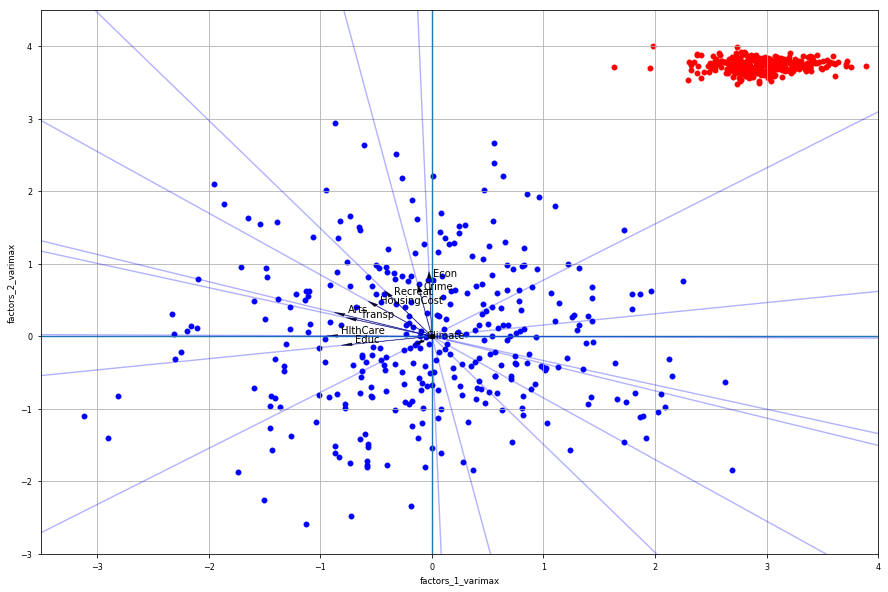

In [18]:
plt.figure(figsize=(15,10))
plt.axis([-3.5,4,-3,4.5])
factors = ['factors_1_loadings','factors_2_loadings']
plotProjectedBase(plt,varimaxFactors,varimaxFactorsLoadingsPD,features)
scatterPlot(plt,placesRatedDF,'HlthCare','Econ','Red')
scatterPlot(plt,factorScoresDF,'factorScore1','factorScore2','Blue')
plt.show()